In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import xlwings as xw
from matplotlib.ticker import FormatStrFormatter


In [2]:
#customer review analysis
def CRA():
    df = pd.read_csv('review_dataset.csv')
    df1 = df.loc[:,"stars"].dropna()
    df2 = []
    for i in df1:            
        values = i.replace("star rating", "")
        df2.append(float(values))
    def count_range(li, min, max):
        ctr = 0
        for x in li:
            if min <= x <= max:
                ctr += 1
        return ctr
    five_star = count_range(df2, 4.5, 5.0)
    four_star = count_range(df2, 3.5, 4.4)
    three_star = count_range(df2, 2.5, 3.4)
    two_star = count_range(df2, 1.5, 2.4)
    one_star = count_range(df2, 0, 1.4)
    null_value = df.status.isnull().sum()

    rating = {'5.0': int(five_star), '4.0': int(four_star), '3.0': int(three_star), '2.0': int(two_star), '1.0': int(one_star), 'Not rated': int(null_value)}
    Star_rated = list(rating.keys())
    Customer_rated = list(rating.values())

    wb = xw.Book()
    wb.save('Customer_Review_Analysis.xlsx')
    wb = xw.Book('Customer_Review_Analysis.xlsx')
    sht = wb.sheets[0]

    sht.range('A1').value = ["Ratings", "No. of Customers"]
    datacell = sht.range('A2:B7')
    sht.range('A2').value = rating
    wb.save()

    def insert_heading(rng, text):
        rng.value = text
        rng.font.bold = True
        rng.font.size = 24
        rng.font.colour = (0,0,139)

    insert_heading(sht.range("A9"), "Customer Review Analysis")

    Plot1 = plt.figure(figsize = (10,5))
    plt.bar(Star_rated, Customer_rated)
    plt.xlabel("Ratings")
    plt.ylabel("No. of Customers")
    plt.grid(False)
    plt.title("Customer Review Analysis")

    sht.pictures.add(Plot1, name = "Bar Chart", update = False, left=sht.range("A11").left, top=sht.range("A11").top, height=200, width=300)
    wb.save()
    wb.close()

In [3]:
#Payment method analysis
def payment_method():
    df = pd.read_csv("orders_2020_2021_DataSet_Updated.csv")
    df1 = df.loc[:,"Payment Method"].dropna()
    null_value = df["Payment Method"].isnull().sum()
    df2 = np.array([])
    for i in df1:
        xxx = i.split(" ₹")
        df2 = np.append(df2, xxx[0])
    df3 = pd.DataFrame(df2)
    df4 = df3.groupby([0]).value_counts()
    df5 = df4.to_frame(name = "No. of Customers")
    df5.loc[len(df5.index)] = null_value
    df5.index.names = ['Payment Methods']
    df5 = df5.rename(index={2: 'Not Payed'})
    # print(df5)
    
    wb = xw.Book()
    wb.save('Payment_Method_Analysis.xlsx')
    wb = xw.Book('Payment_Method_Analysis.xlsx')
    sht = wb.sheets[0]

    sht.range('A1').value = df5
    wb.save()

    def insert_heading(rng, text):
        rng.value = text
        rng.font.bold = True
        rng.font.size = 24
        rng.font.colour = (0,0,139)

    insert_heading(sht.range("A7"), "Payment Method Analysis")
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.bar(df5.index.values, df5["No. of Customers"])
    plt.xlabel("Payment Methods")
    plt.ylabel("No. of Customers")
    plt.xticks(rotation=45)
    plt.grid(False)
    

    plt.subplot(1, 2, 2)
    plt.pie(df5["No. of Customers"], labels = df5.index.values)
    plt.axis('equal')
    plt.suptitle("Payment Method Analysis")
    plt.tight_layout()

    sht.pictures.add(fig, name = "Bar & Pie Chart", update = True, left=sht.range("A9").left, top=sht.range("A9").top, height=300, width=600)
    wb.save()
    wb.close()

    
 


In [4]:
# Analysis of Top Consumer states of india
def Top_States():
    df = pd.read_csv("orders_2020_2021_DataSet_Updated.csv")
    df1 = df["Billing State"].dropna().value_counts()
    df1 = df1.to_frame(name = "No. of Customers")
    df2 = df1.head(10)
    df2.index.names = ['Billing State']
    print(df2)
    wb = xw.Book()
    wb.save('Top_Consumer_States_Analysis.xlsx')
    wb = xw.Book('Top_Consumer_States_Analysis.xlsx')
    sht = wb.sheets[0]

    sht.range('A1').value = df2
    wb.save()

    def insert_heading(rng, text):
        rng.value = text
        rng.font.bold = True
        rng.font.size = 24
        rng.font.colour = (0,0,139)

    insert_heading(sht.range("A12"), "Top Consumer States of India")
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 1, 1)
    plt.bar(df2.index.values, df2["No. of Customers"])
    plt.xlabel("States")
    plt.xticks(rotation=45)
    plt.ylabel("No. of Customers")
    plt.grid(False)
    plt.show()
    sht.pictures.add(fig, name = "Bar Chart", update = True, left=sht.range("A14").left, top=sht.range("A14").top, height=300, width=600)
    wb.save()
    wb.close()

In [5]:
# Analysis of Top Consumer City of india
def Top_Cities():
    df = pd.read_csv("orders_2020_2021_DataSet_Updated.csv")
    df1 = df["Billing City"].dropna()
    df1 = df1.str.lower()
    df2 = df1.to_frame(name = "Billing City")
    df3 = df2["Billing City"].value_counts()
    df3 = df3.to_frame(name = "No. of Customers")
    df3.index.names = ['Billing City']
    df4 = df3.head(10)
    df4 = df4.drop('test')
    print(df4)
    wb = xw.Book()
    wb.save('Top_Consumer_Cities_Analysis.xlsx')
    wb = xw.Book('Top_Consumer_Cities_Analysis.xlsx')
    sht = wb.sheets[0]

    sht.range('A1').value = df4
    wb.save()

    def insert_heading(rng, text):
        rng.value = text
        rng.font.bold = True
        rng.font.size = 24
        rng.font.colour = (0,0,139)

    insert_heading(sht.range("A12"), "Top Consumer Cities of India")
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 1, 1)
    plt.bar(df4.index.values, df4["No. of Customers"])
    plt.xlabel("Cities")
    plt.xticks(rotation=45)
    plt.ylabel("No. of Customers")
    plt.grid(False)
    plt.show()
    sht.pictures.add(fig, name = "Bar Chart", update = True, left=sht.range("A14").left, top=sht.range("A14").top, height=300, width=600)
    wb.save()
    wb.close()

In [6]:
# Analysis of Top Selling Product Categories
def Top_product():
    df = pd.read_csv('review_dataset.csv')
    df1 = df["category"].dropna()
    df1 = df1.to_frame("category")
    df2 = df1["category"].value_counts()
    df2 = df2.to_frame("Counts")
    df2.index.names = ["Product Category"]
    df2 = df2.drop(["Mumbai", "Bengaluru", "Chennai"])
    df3 = df2.head(10)

    wb = xw.Book()
    wb.save('Top_Selling_Product_Categories_Analysis.xlsx')
    wb = xw.Book('Top_Selling_Product_Categories_Analysis.xlsx')
    sht = wb.sheets[0]

    sht.range('A1').value = df3
    wb.save()

    def insert_heading(rng, text):
        rng.value = text
        rng.font.bold = True
        rng.font.size = 24
        rng.font.colour = (0,0,139)

    insert_heading(sht.range("A12"), "Top Selling Products Categories")
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 1, 1)
    plt.bar(df3.index.values, df3["Counts"])
    plt.xlabel("Top Selling Products")
    plt.xticks(rotation=45)
    plt.ylabel("Counts")
    plt.grid(False)
    plt.show()
    sht.pictures.add(fig, name = "Bar Chart", update = True, left=sht.range("A14").left, top=sht.range("A14").top, height=300, width=600)
    wb.save()
    wb.close()


In [7]:
#Analysis of reviews of top selling product categories
def Review_top_product():
    df = pd.read_csv("review_dataset.csv")
    df1 = df.loc[:,"stars"].dropna()
    df2 = []
    for i in df1:            
        values = i.replace("star rating", "")
        df2.append(float(values))
    df2 = pd.DataFrame({'Ratings':df2})
    joined = df.join(df2)

    new_df = joined[["category", "Ratings"]]
    new_df1 = new_df['category'].value_counts()
    new_df1 = new_df1.to_frame()
    new_df1.reset_index(inplace = True)
    new_df1.columns = ['Category', 'Category Counts']

    new_df2 = new_df.groupby(['category']).mean()
    new_df2.reset_index(inplace = True)
    new_df1 = new_df1.sort_values("Category", ascending=True)
    new_df1.reset_index(inplace = True)
    new_df1 = new_df1.drop(['index'], axis = 1)
    ndf = pd.concat([new_df1, new_df2], axis = 1)
    ndf = ndf.drop(['category'], axis = 1)
    ndf = ndf.sort_values("Category Counts", ascending=False)
    ndf.reset_index(inplace = True)
    ndf = ndf.drop(['index'], axis = 1)
    ndf = ndf.drop([2, 3, 5])
    ndf.reset_index(inplace = True)
    ndf = ndf.drop(['index'], axis = 1)
    ndf = ndf.head(10)

    wb = xw.Book()
    wb.save('Reviews_of_Top_Selling_Product_Categories_Analysis.xlsx')
    wb = xw.Book('Reviews_of_Top_Selling_Product_Categories_Analysis.xlsx')
    sht = wb.sheets[0]

    sht.range('A1').value = ndf
    wb.save()
    
    def insert_heading(rng, text):
        rng.value = text
        rng.font.bold = True
        rng.font.size = 24
        rng.font.colour = (0,0,139)

    insert_heading(sht.range("A12"), "Reviews of Top Selling Product Categories")
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 1, 1)
    plt.bar(ndf['Category'], ndf["Ratings"])
    plt.xlabel("Top Selling Products")
    plt.xticks(rotation=45)
    plt.ylabel("Ratings")

    plt.grid(False)
    plt.show()
    sht.pictures.add(fig, name = "Bar Chart", update = True, left=sht.range("A14").left, top=sht.range("A14").top, height=300, width=600)
    wb.save()
    wb.close()



In [8]:
#Analysis of Orders per month per year
def orders_per_month():
    df = pd.read_csv("orders_2020_2021_DataSet_Updated.csv")
    df1 = df["Fulfillment Date and Time Stamp"].dropna()
    df2 = []
    for i in df1:            
        values = i.replace(" +0530", "")
        df2.append(values)
    df2 = pd.DataFrame(df2, columns=['Time Stamp'])
    df2['Time Stamp'] = pd.to_datetime(df2['Time Stamp'], format= '%d-%m-%Y %H:%M:%S')
    df3 = []
    for i in range(len(df2)):
        df3.append(df2.loc[i, "Time Stamp"].month)
    df3 = pd.DataFrame(df3)
    df3 = df3.value_counts()
    df3 = df3.to_frame()
    df3.index.names = ["Order Months"]
    df3.columns = ["No. of Orders"]
    df3 = df3.sort_values("Order Months", ascending = True)
    df3.index = ['january', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    wb = xw.Book()
    wb.save('Number of Orders Per Month Per Year.xlsx')
    wb = xw.Book('Number of Orders Per Month Per Year.xlsx')
    sht = wb.sheets[0]

    sht.range('A1').value = df3
    wb.save()

    def insert_heading(rng, text):
        rng.value = text
        rng.font.bold = True
        rng.font.size = 24
        rng.font.colour = (0,0,139)

    insert_heading(sht.range("A14"), "Number of Orders Per Month Per Year")
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 1, 1)
    plt.bar(df3.index.values, df3['No. of Orders'])
    plt.xlabel("Month")
    plt.xticks(rotation=45)
    plt.ylabel("No. of Orders")

    plt.grid(False)
    plt.show()
    sht.pictures.add(fig, name = "Bar Chart", update = True, left=sht.range("A16").left, top=sht.range("A16").top, height=300, width=600)
    wb.save()
    wb.close()


In [9]:
#Analysis of reviews of top selling product categories
def Review_orders_per_month():
    df = pd.read_csv("review_dataset.csv")
    df1 = df.loc[:,"stars"].dropna()
    df2 = []
    for i in df1:            
        values = i.replace("star rating", "")
        df2.append(float(values))
    df2 = pd.DataFrame({'Ratings':df2})
    joined = df.join(df2)

    new_df = joined[["category", "Ratings"]]
    new_df1 = new_df['category'].value_counts()
    new_df1 = new_df1.to_frame()
    new_df1.reset_index(inplace = True)
    new_df1.columns = ['Category', 'Category Counts']

    new_df2 = new_df.groupby(['category']).mean()
    new_df2.reset_index(inplace = True)
    new_df1 = new_df1.sort_values("Category", ascending=True)
    new_df1.reset_index(inplace = True)
    new_df1 = new_df1.drop(['index'], axis = 1)
    ndf = pd.concat([new_df1, new_df2], axis = 1)
    ndf = ndf.drop(['category'], axis = 1)
    ndf = ndf.sort_values("Category Counts", ascending=False)
    ndf.reset_index(inplace = True)
    ndf = ndf.drop(['index'], axis = 1)
    ndf = ndf.drop([2, 3, 5])
    ndf.reset_index(inplace = True)
    ndf = ndf.drop(['index'], axis = 1)
    ndf = ndf.head(10)

    wb = xw.Book()
    wb.save('Reviews_of_Orders_Per_Month_Analysis.xlsx')
    wb = xw.Book('Reviews_of_Orders_Per_Month_Analysis.xlsx')
    sht = wb.sheets[0]

    sht.range('A1').value = ndf
    wb.save()
    
    def insert_heading(rng, text):
        rng.value = text
        rng.font.bold = True
        rng.font.size = 24
        rng.font.colour = (0,0,139)

    insert_heading(sht.range("A12"), "Reviews of Orders per Month")
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 1, 1)
    plt.bar(ndf['Category'], ndf["Ratings"])
    plt.xlabel("Orders")
    plt.xticks(rotation=45)
    plt.ylabel("Ratings")

    plt.grid(False)
    plt.show()
    sht.pictures.add(fig, name = "Bar Chart", update = True, left=sht.range("A14").left, top=sht.range("A14").top, height=300, width=600)
    wb.save()
    wb.close()



In [10]:
#Analysis of orders across parts of a day
def Orders_across_parts_of_a_day():
    df = pd.read_csv("orders_2020_2021_DataSet_Updated.csv")
    df1 = df["Fulfillment Date and Time Stamp"].dropna()
    df2 = []
    for i in df1:            
        values = i.replace(" +0530", "")
        df2.append(values)
    df2 = pd.DataFrame(df2, columns=['Time Stamp'])

    df2['Time Stamp'] = pd.to_datetime(df2['Time Stamp'], format= '%d-%m-%Y %H:%M:%S')
    df3 = []
    for i in range(len(df2)):
        df3.append(df2.loc[i, "Time Stamp"].hour)
    df3 = pd.DataFrame(df3)
    df3 = df3.value_counts()
    df3 = df3.to_frame()
    df3.index.names = ["Order Hour"]
    df3.columns = ["No. of Orders"]
    df3 = df3.sort_values("Order Hour", ascending = True)

    df3.index = ['0:1', '1:2', '2:3', '3:4', '6:7', '7:8', '8:9', '10:11', '11:12', '12:13', '13:14', '14:15', '15:16', '16:17', '17:18', '18:19', '19:20', '20:21', '21:22', '22:23', '23:24']
    print(df3)

    wb = xw.Book()
    wb.save('Number of Orders Per Day.xlsx')
    wb = xw.Book('Number of Orders Per Day.xlsx')
    sht = wb.sheets[0]

    sht.range('A1').value = df3
    wb.save()

    def insert_heading(rng, text):
        rng.value = text
        rng.font.bold = True
        rng.font.size = 24
        rng.font.colour = (0,0,139)

    insert_heading(sht.range("A24"), "Number of Orders Per Day")
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1, 1, 1)
    plt.bar(df3.index.values, df3['No. of Orders'])
    plt.xlim(0, 31)
    plt.xlabel("Hours")
    plt.xticks(rotation=45)
    plt.ylabel("No. of Orders")
    plt.tight_layout()

    plt.grid(False)
    plt.show()
    sht.pictures.add(fig, name = "Bar Chart", update = True, left=sht.range("A26").left, top=sht.range("A26").top, height=300, width=600)
    wb.save()
    wb.close()


In [11]:
print('Enter 1 to see the analysis of Reviews given by customers')
print('Enter 2 to see the analysis o different payment methods used by the customers')
print('Enter 3 to see the analysis of top cusumer states of india')
print('Enter 4 to see the analysis of top consumer cities of india')
print('Enter 5 to see the analysis of top selling product categories')
print('Enter 6 to see the analysis of Reviews for all product categories')
print('Enter 7 to see the analysis of number of orders per month per year')
print('Enter 8 to see the analysis of reviews for number of orders per month per year')
print('Enter 9 to see the analysis of number of orders across parts of a day')

Enter 1 to see the analysis of Reviews given by customers
Enter 2 to see the analysis o different payment methods used by the customers
Enter 3 to see the analysis of top cusumer states of india
Enter 4 to see the analysis of top consumer cities of india
Enter 5 to see the analysis of top selling product categories
Enter 6 to see the analysis of Reviews for all product categories
Enter 7 to see the analysis of number of orders per month per year
Enter 8 to see the analysis of reviews for number of orders per month per year
Enter 9 to see the analysis of number of orders across parts of a day


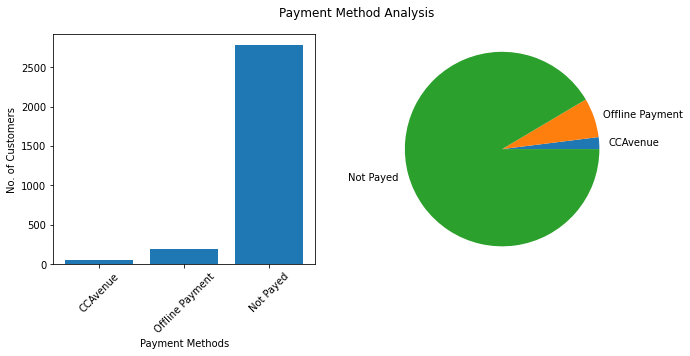

In [12]:
Enter = int(input("Enter Number: "))
if Enter == 1:
    CRA()
elif Enter == 2:
    payment_method()
elif Enter == 3:
    Top_States()
elif Enter == 4:
    Top_Cities()
elif Enter == 5:
    Top_product()
elif Enter == 6:
    Review_top_product()
elif Enter == 7:
    orders_per_month()
elif Enter == 8:
    Review_orders_per_month()
elif Enter == 9:
    Orders_across_parts_of_a_day()
else:
    print('Please Enter valid number!')
